In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score

In [2]:
file_path = 'CC GENERAL.csv'

data = pd.read_csv(file_path)

data = data.drop_duplicates()
data = data.dropna()
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [3]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [4]:
# Step 2: 
agg_cluster = AgglomerativeClustering(n_clusters=3)  
clusters_agg = agg_cluster.fit_predict(data.drop(columns=['CUST_ID'])) 


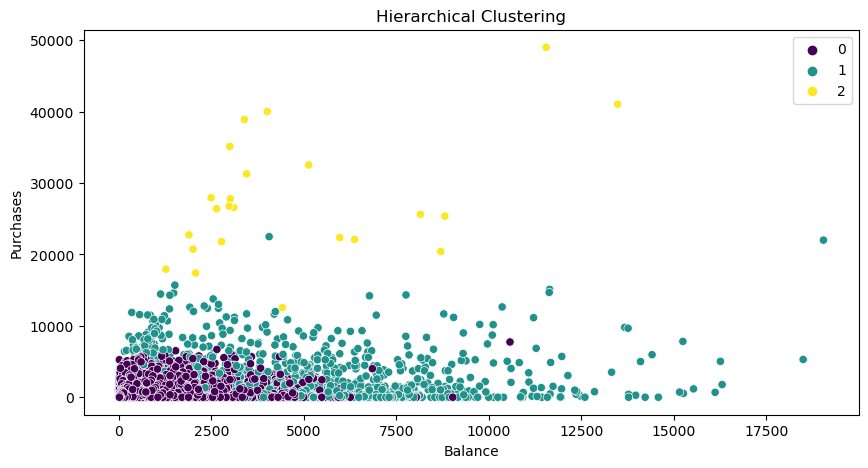

In [14]:
# Step 3:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['BALANCE'], y=data['PURCHASES'], hue=clusters_agg, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

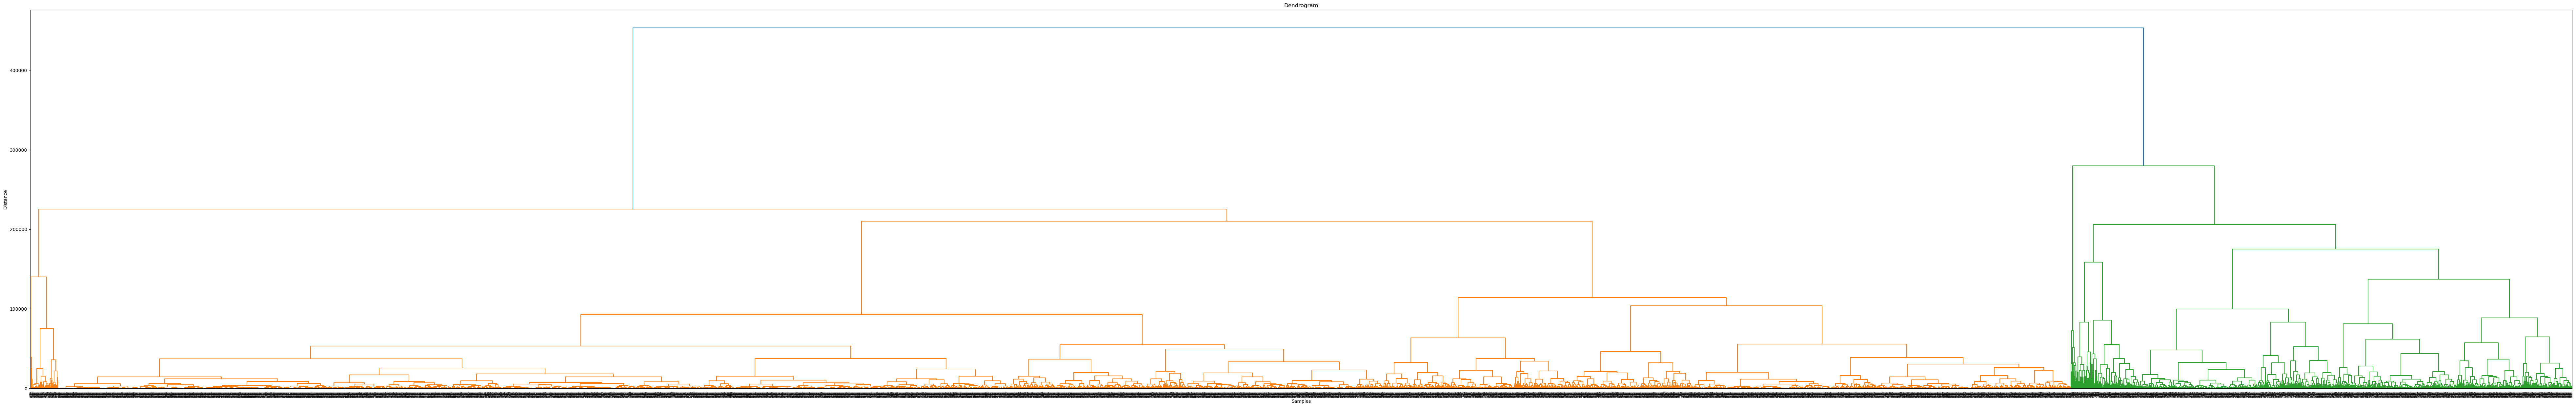

In [22]:
# Step 4: 
plt.figure(figsize=(100, 15))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data.drop(columns=['CUST_ID']), method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

C:\Users\khali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

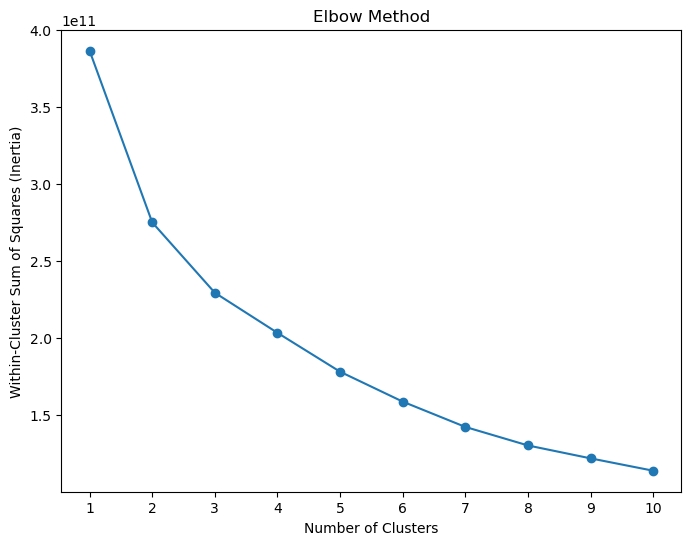

In [29]:
# Calculate the within-cluster sum of squares (inertia) for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data.drop(columns=['CUST_ID']))
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(range(1, 11))
plt.show()


In [24]:
# Step 5: 
kmeans = KMeans(n_clusters=3)  
kmeans.fit(data.drop(columns=['CUST_ID']))

C:\Users\khali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

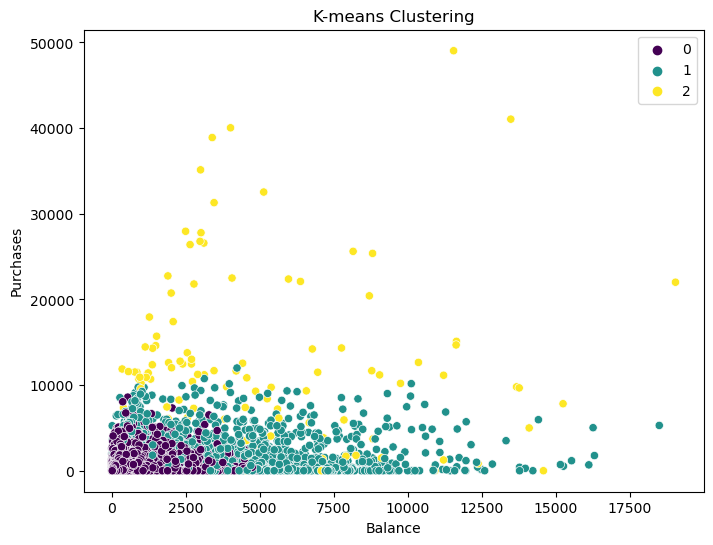

In [25]:
# Step 6: Plot the clusters for K-means clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['BALANCE'], y=data['PURCHASES'], hue=kmeans.labels_, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

In [26]:
# Step 7: Compare the two results
silhouette_score_hierarchical = silhouette_score(data.drop(columns=['CUST_ID']), clusters_agg)
silhouette_score_kmeans = silhouette_score(data.drop(columns=['CUST_ID']), kmeans.labels_)



Silhouette Score (Hierarchical Clustering): 0.4942509934704669
Silhouette Score (K-means Clustering): 0.46531286243862174


In [27]:
print("Silhouette Score (Hierarchical Clustering):", silhouette_score_hierarchical)
print("Silhouette Score (K-means Clustering):", silhouette_score_kmeans)

Silhouette Score (Hierarchical Clustering): 0.4942509934704669
Silhouette Score (K-means Clustering): 0.46531286243862174


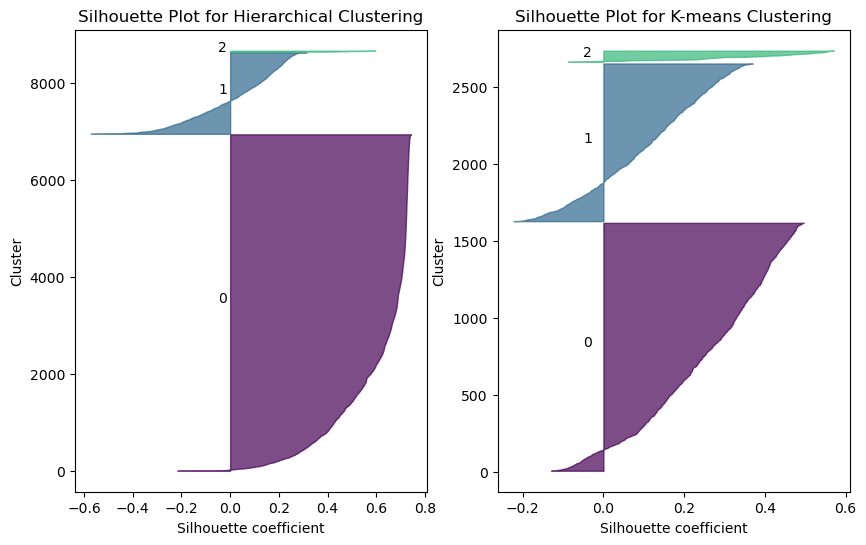

In [31]:
# Bonus: Search for another validation metric

from sklearn.metrics import silhouette_samples
import numpy as np

# Calculate silhouette scores for each data point
silhouette_vals_agg = silhouette_samples(data.drop(columns=['CUST_ID']), clusters_agg)
silhouette_vals_kmeans = silhouette_samples(data.drop(columns=['CUST_ID']), kmeans.labels_)

# Create silhouette plots for hierarchical clustering
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
y_lower = 10
for i in range(3):
    cluster_silhouette_vals = silhouette_vals_agg[clusters_agg == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    color = plt.cm.viridis(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10
plt.title('Silhouette Plot for Hierarchical Clustering')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

# Create silhouette plots for K-means clustering
plt.subplot(1, 2, 2)
y_lower = 10
for i in range(3):
    cluster_silhouette_vals = silhouette_vals_kmeans[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    color = plt.cm.viridis(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10
plt.title('Silhouette Plot for K-means Clustering')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

plt.show()
